In [1]:
import os
#Avoids issues with paralellization in emcee
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import corner

In [3]:

f = fits.open('RRLwithprobthin.fit')  # open a FITS file
data = f[1].data  # assume the first extension is a table
header = f[1].header
# print(Table(data))
# print(header)
data.columns

ColDefs(
    name = 'recno'; format = 'I8'; start = 2
    name = 'SolID'; format = 'I19'; start = 11
    name = 'DR2Name'; format = 'A28'; start = 31
    name = 'RA_ICRS'; format = 'F13.9'; unit = 'deg'; start = 60
    name = 'e_RA_ICRS'; format = 'F5.3'; unit = 'mas'; start = 74
    name = 'DE_ICRS'; format = 'F13.9'; unit = 'deg'; start = 80
    name = 'e_DE_ICRS'; format = 'F5.3'; unit = 'mas'; start = 94
    name = 'Plx'; format = 'F5.2'; unit = 'mas'; start = 100
    name = 'e_Plx'; format = 'F4.2'; unit = 'mas'; start = 106
    name = 'pmRA'; format = 'F7.3'; unit = 'mas/yr'; start = 111
    name = 'e_pmRA'; format = 'F6.3'; unit = 'mas/yr'; start = 119
    name = 'pmDE'; format = 'F7.3'; unit = 'mas/yr'; start = 126
    name = 'e_pmDE'; format = 'F6.3'; unit = 'mas/yr'; start = 134
    name = 'ID-PS1'; format = 'I5'; start = 141
    name = 'RAdegP'; format = 'F9.5'; unit = 'deg'; start = 147
    name = 'DEdegP'; format = 'F9.5'; unit = 'deg'; start = 157
    name = 'S3ab'; forma

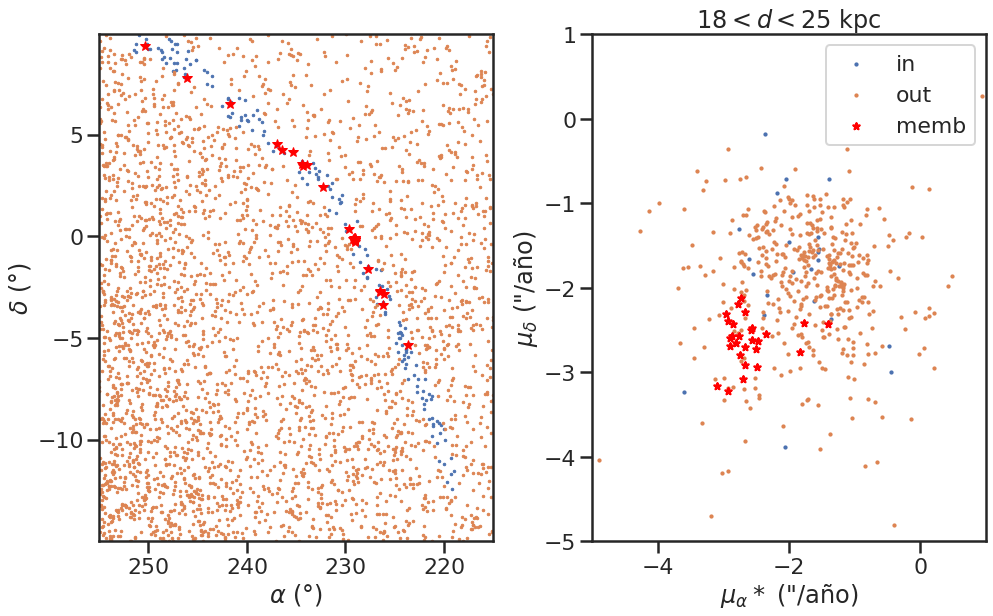

In [4]:
import pylab as plt   #These are different ways of loading a library. 
import scipy
import numpy as np
import seaborn as sns
sns.set(style="ticks", context="poster")

d_in = (data['Dist']>18) & (data['Dist']<25)
inside = (data['Track']==1) 
out = (data['Track']==0)
miembro = inside & (data['Memb']>0.5)

fig=plt.figure(1,figsize=(14,8))
fig.subplots_adjust(wspace=0.25,hspace=0.34,top=0.95,bottom=0.07,left=0.07,right=0.95)
ax=fig.add_subplot(121)
ax.plot(data[inside]['RA_ICRS'],data[inside]['DE_ICRS'],'.',ms=5)
ax.plot(data[out]['RA_ICRS'],data[out]['DE_ICRS'],'.',ms=5)
ax.plot(data[miembro]['RA_ICRS'],data[miembro]['DE_ICRS'],'*',c='red',ms=10)
ax.set_xlabel('$\\alpha$ (°)')
ax.set_ylabel('$\delta$ (°)')
ax.set_xlim([max(data['RA_ICRS']), min(data['RA_ICRS'])])
ax.set_ylim([min(data['DE_ICRS']), max(data['DE_ICRS'])])

ax=fig.add_subplot(122)
ax.scatter(data[inside & d_in]['pmRA'],data[inside & d_in]['pmDE'],s=5, label='in')
ax.scatter(data[out & d_in]['pmRA'],data[out & d_in]['pmDE'],s=5, label='out')
ax.scatter(data[miembro & d_in]['pmRA'],data[miembro & d_in]['pmDE'],s=50, marker='*',color='red', label='memb')
ax.set_xlabel('$\mu_\\alpha*$ ("/año)')
ax.set_ylabel('$\mu_\delta$ ("/año)')
ax.set_title('$18 < d < 25$ kpc')
ax.legend()
ax.set_xlim([-5,1])
ax.set_ylim([-5,1]);

In [5]:
import numpy as np
import astropy
import astropy.coordinates as ac
import astropy.units as u
import gala.coordinates as gc
import galstreams

_ = ac.galactocentric_frame_defaults.set('v4.0') #set the default Astropy Galactocentric frame parameters to the values adopted in Astropy v4.0

c = ac.ICRS(ra=data['RA_ICRS']*u.degree, dec=data['DE_ICRS']*u.degree, pm_ra_cosdec=data['pmRA']*u.mas/u.yr, pm_dec=data['pmDE']*u.mas/u.yr)
pal = c.transform_to(gc.Pal5PriceWhelan18())

phi1 = pal.phi1 #deg
phi2 = pal.phi2 #deg
pmphi1 = pal.pm_phi1_cosphi2 #mas/yr
pmphi2 = pal.pm_phi2 #mas/yr
d = data['Dist'] #kpc


st = "Pal5-PW19"
mwsts = galstreams.MWStreams(verbose=False, implement_Off=False)
track = mwsts[st].track
pal_track = track.transform_to(gc.Pal5PriceWhelan18())

phi1_t = pal_track.phi1
phi2_t = pal_track.phi2
pmphi1_t = pal_track.pm_phi1_cosphi2
pmphi2_t = pal_track.pm_phi2 

Initializing galstreams library from master_log... 


In [78]:
mm = np.abs(phi1_t.value)<0.1
pmphi1_t[mm]

(<Quantity [0.71293787, 0.71327049, 0.71360367, 0.71393742, 0.71427174,
            0.71460663, 0.71494208, 0.7152781 , 0.71561468, 0.71595183,
            0.71628955, 0.71662783, 0.71696669, 0.71730611, 0.71764609,
            0.71798664, 0.71832776, 0.71866945, 0.7190117 , 0.71935452] mas / yr>,
 <Quantity [-2.68093614, -2.68143247, -2.68192919, -2.68242628, -2.68292377,
            -2.68342163, -2.68391988, -2.68441852, -2.68491754, -2.68541694,
            -2.68591673, -2.6864169 , -2.68691746, -2.6874184 , -2.68791973,
            -2.68842145, -2.68892355, -2.68942603, -2.6899289 , -2.69043216] mas / yr>)

(-2.5, 2.5)

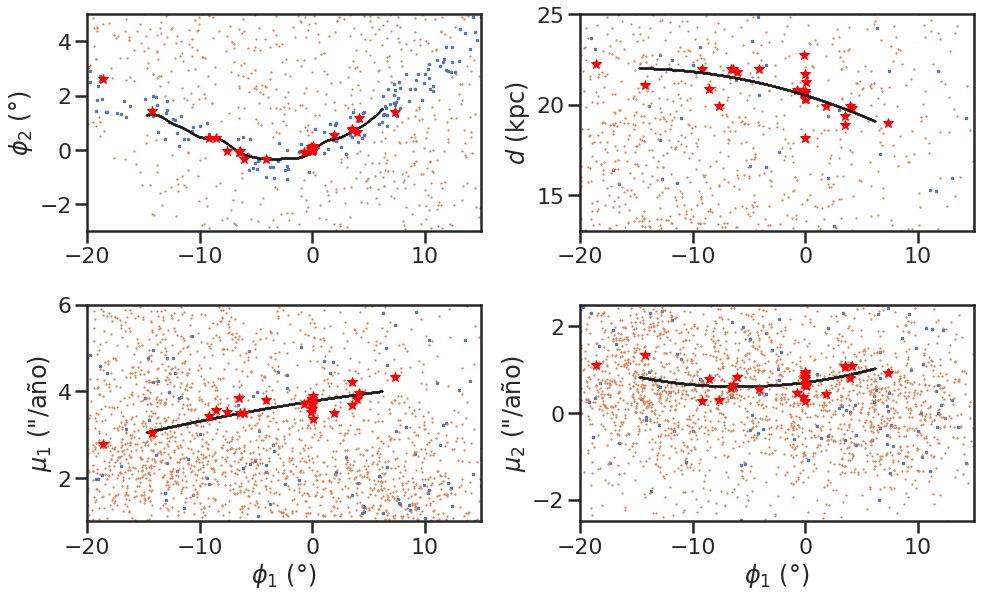

In [6]:
d_in = (data['Dist']>18) & (data['Dist']<25)
inside = (data['Track']==1) 
out = (data['Track']==0)
miembro = inside & (data['Memb']>0.5)

fig=plt.figure(1,figsize=(14,8))
fig.subplots_adjust(wspace=0.25,hspace=0.34,top=0.95,bottom=0.07,left=0.07,right=0.95)
ax=fig.add_subplot(221)
ax.plot(phi1[inside],phi2[inside],'.',ms=5)
ax.plot(phi1[out],phi2[out],'.',ms=2.5)
ax.plot(phi1_t,phi2_t,'k.',ms=1.)
ax.plot(phi1[miembro],phi2[miembro],'*',c='red',ms=10.)
# ax.set_xlabel('$\phi_1$ (°)')
ax.set_ylabel('$\phi_2$ (°)')
ax.set_xlim([-20,15])
ax.set_ylim([-3,5])

ax=fig.add_subplot(222)
ax.plot(phi1[inside],d[inside],'.',ms=5)
ax.plot(phi1[out],d[out],'.',ms=2.5)
ax.plot(phi1[miembro],d[miembro],'*',c='red',ms=10.)
# ax.set_xlabel('$\phi_1$ (°)')
ax.plot(phi1_t,pal_track.distance,'k.',ms=1.)
ax.set_ylabel('$d$ (kpc)')
ax.set_xlim([-20,15])
ax.set_ylim([13,25])

ax=fig.add_subplot(223)
ax.plot(phi1[inside],pmphi1[inside],'.',ms=5)
ax.plot(phi1[out],pmphi1[out],'.',ms=2.5)
ax.plot(phi1_t,pmphi1_t,'k.',ms=1.)
ax.plot(phi1[miembro],pmphi1[miembro],'*',c='red',ms=10.)
ax.set_xlabel('$\phi_1$ (°)')
ax.set_ylabel('$\mu_1$ ("/año)')
ax.set_xlim([-20,15])
ax.set_ylim([1,6])

ax=fig.add_subplot(224)
ax.plot(phi1[inside],pmphi2[inside],'.',ms=5)
ax.plot(phi1[out],pmphi2[out],'.',ms=2.5)
ax.plot(phi1_t,pmphi2_t,'k.',ms=1.)
ax.plot(phi1[miembro],pmphi2[miembro],'*',c='red',ms=10.)
ax.set_xlabel('$\phi_1$ (°)')
ax.set_ylabel('$\mu_2$ ("/año)')
ax.set_xlim([-20,15])
ax.set_ylim([-2.5,2.5])

(-14.998946495, 9.92887434)

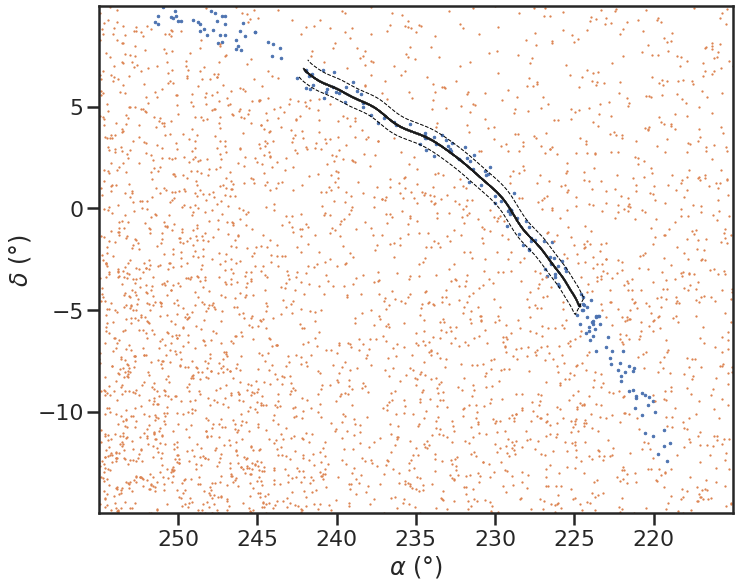

In [7]:
st = "Pal5-PW19"

fig=plt.figure(1,figsize=(10,8))
fig.subplots_adjust(wspace=0.25,hspace=0.34,top=0.95,bottom=0.07,left=0.07,right=0.95)
ax=fig.add_subplot(111)
ax.plot(data[inside]['RA_ICRS'],data[inside]['DE_ICRS'],'.',ms=5)
ax.plot(data[out]['RA_ICRS'],data[out]['DE_ICRS'],'.',ms=2.5)
ax.plot(track.ra, track.dec, 'k.', ms=1.)
ax.plot(mwsts[st].poly_sc.icrs.ra, mwsts[st].poly_sc.icrs.dec, lw=1.,ls='--', color='black')
ax.set_xlabel('$\\alpha$ (°)')
ax.set_ylabel('$\delta$ (°)')
ax.set_xlim([max(data['RA_ICRS']), min(data['RA_ICRS'])])
ax.set_ylim([min(data['DE_ICRS']), max(data['DE_ICRS'])])

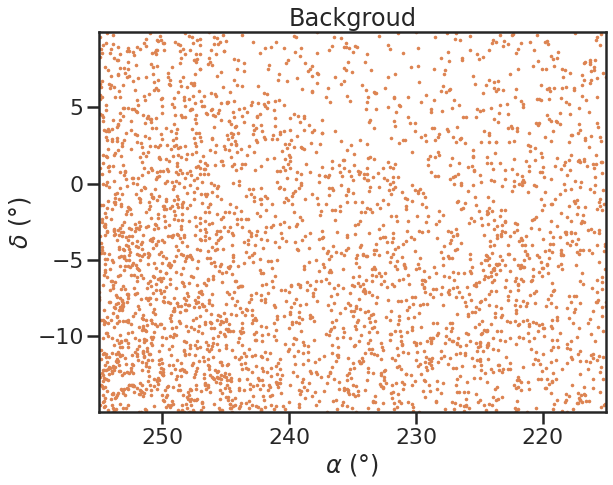

In [7]:
##Modelo del fondo
import pylab as plt   #These are different ways of loading a library. 
import scipy
import numpy as np
import seaborn as sns
sns.set(style="ticks", context="poster")
from astroML.density_estimation import XDGMM

st = "Pal5-PW19"
ra = data['RA_ICRS']
e_ra = data['e_RA_ICRS']/3600
dec = data['DE_ICRS']
e_dec = data['e_DE_ICRS']/3600

pmra = data['pmRA']
e_pmra = data['e_pmRA']
pmdec = data['pmDE']
e_pmdec = data['e_pmDE']

field = ac.SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs')
#Select the field points inside the polygon footprint
off = ~mwsts[st].get_mask_in_poly_footprint(field)

ra_out = ra[off]
dec_out = dec[off]
e_ra_out = e_ra[off]
e_dec_out = e_dec[off]

pmra_out = pmra[off]
pmdec_out = pmdec[off]
e_pmra_out = e_pmra[off]
e_pmdec_out = e_pmdec[off]

d_out = d[off]
e_d_out = d_out*0.03

fig=plt.figure(1,figsize=(8,6))
fig.subplots_adjust(wspace=0.25,hspace=0.34,top=0.95,bottom=0.07,left=0.07,right=0.95)
ax=fig.add_subplot(111)
ax.scatter(ra_out+50, dec_out+50, s=5)
ax.scatter(ra_out, dec_out, s=2.5)
ax.set_xlim([max(ra_out), min(ra_out)])
ax.set_ylim([min(dec_out), max(dec_out)])
ax.set_xlabel('$\\alpha$ (°)')
ax.set_ylabel('$\delta$ (°)')
ax.set_title('Backgroud');

In [8]:
##Extreme deconvolution en pm y d
from sklearn.mixture import GaussianMixture

X = np.vstack([pmra_out, pmdec_out, d_out]).T
Xerr = np.zeros(X.shape + X.shape[-1:])
diag = np.arange(X.shape[-1])
Xerr[:, diag, diag] = np.vstack([e_pmra_out**2, e_pmdec_out**2, e_d_out**2]).T

#Busco mejor numero de gaussianas
def compute_XDGMM(N, max_iter=1000):
    models = [None for n in N]
    for i in range(len(N)):
        print("N =", N[i])
        models[i] = XDGMM(n_components=N[i], max_iter=max_iter)
        models[i].fit(X, Xerr)
    return models

def compute_GaussianMixture(N, covariance_type='full', max_iter=1000):
    models = [None for n in N]
    for i in range(len(N)):
        models[i] = GaussianMixture(n_components=N[i], max_iter=max_iter, covariance_type=covariance_type)
        models[i].fit(X)
        print("best fit converged:", models[i].converged_)
    return models

# N = np.arange(3,13) #Con 1 gaussiana da error
N = np.arange(6,7)
models = compute_XDGMM(N)
models_gmm = compute_GaussianMixture(N)


N = 6


/home/bdominguez/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


best fit converged: True


In [9]:
BIC = [None for n in N]
BIC_gmm2 = [None for n in N]
for i in range(len(N)):
    k = (N[i]-1) + np.tri(X.shape[1]).sum()*N[i] + X.shape[1]*N[i] #N_componentes = Pesos + covariaza(matiz simetrica) + medias
    BIC[i] = -2*models[i].logL(X,Xerr) + k*np.log(X.shape[0])
    BIC_gmm2[i] = -2*np.sum(models_gmm[i].score_samples(X)) + k*np.log(X.shape[0])
BIC_gmm = [m.bic(X) for m in models_gmm]

i_best = np.argmin(BIC)
i_best_gmm = np.argmin(BIC_gmm)

xdgmm_best = models[i_best]
gmm_best = models_gmm[i_best] #Me quedo con el mejor modelo de gmm segun xd

BIC: n_components =  6
BIC_gmm: n_components =  6


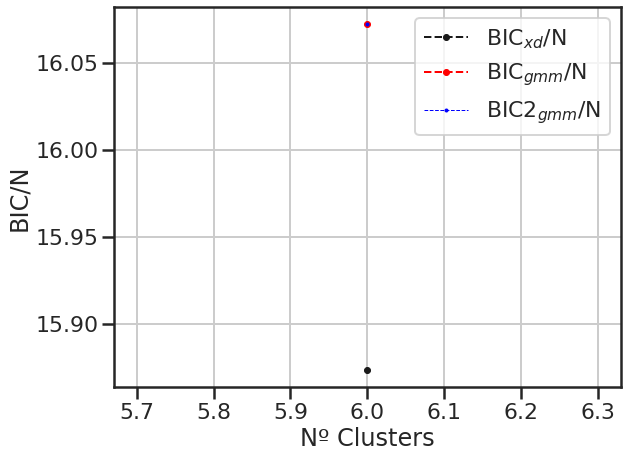

In [11]:
BIC = [None for n in N]
BIC_gmm2 = [None for n in N]
for i in range(len(N)):
    k = (N[i]-1) + np.tri(X.shape[1]).sum()*N[i] + X.shape[1]*N[i] #N_componentes = Pesos + covariaza(matiz simetrica) + medias
    BIC[i] = -2*models[i].logL(X,Xerr) + k*np.log(X.shape[0])
    BIC_gmm2[i] = -2*np.sum(models_gmm[i].score_samples(X)) + k*np.log(X.shape[0])
BIC_gmm = [m.bic(X) for m in models_gmm]

i_best = np.argmin(BIC)
i_best_gmm = np.argmin(BIC_gmm)

xdgmm_best = models[i_best]
gmm_best = models_gmm[i_best] #Me quedo con el mejor modelo de gmm segun xd

fig=plt.figure(1,figsize=(8,6))
fig.subplots_adjust(wspace=0.25,hspace=0.34,top=0.95,bottom=0.07,left=0.07,right=0.95)
ax=fig.add_subplot(111)
ax.plot(N, np.array(BIC)/X.shape[0], '--k', marker='o', lw=2, ms=6, label='BIC$_{xd}$/N')
ax.plot(N, np.array(BIC_gmm)/X.shape[0], '--', c='red', marker='o', lw=2, ms=6, label='BIC$_{gmm}$/N')
ax.plot(N, np.array(BIC_gmm2)/X.shape[0], '--', c='blue', marker='o', lw=1., ms=3, label='BIC2$_{gmm}$/N')
# ax.plot(N, np.array(BIC3)/X.size, '--b', marker='o', lw=2, ms=6, label='BIC3/N')
ax.legend()
ax.set_xlabel('Nº Clusters')
ax.set_ylabel('BIC/N')
ax.grid()

print("BIC: n_components =  %i" % N[i_best])
print("BIC_gmm: n_components =  %i" % N[i_best_gmm])

(0, 40.0)

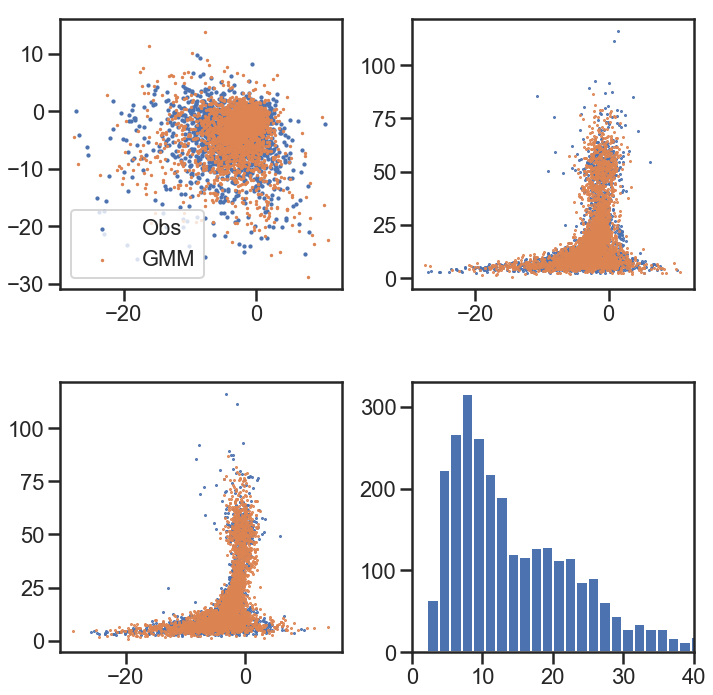

In [187]:
sample = gmm_best.sample(ra_out.size)

fig=plt.figure(1,figsize=(10,10))
fig.subplots_adjust(wspace=0.25,hspace=0.34,top=0.95,bottom=0.07,left=0.07,right=0.95)
ax=fig.add_subplot(221)
ax.scatter(pmra_out, pmdec_out, s=5, label='Obs')
ax.scatter(sample[0][:,0], sample[0][:,1], s=2, label='GMM')
ax.legend()

ax=fig.add_subplot(222)
ax.scatter(pmra_out, d_out, s=1, label='Obs')
ax.scatter(sample[0][:,0], sample[0][:,2], s=1, label='GMM')

ax=fig.add_subplot(223)
ax.scatter(pmdec_out, d_out, s=1, label='Obs')
ax.scatter(sample[0][:,1], sample[0][:,2], s=1, label='GMM')

ax=fig.add_subplot(224)
ax.hist(d_out,bins=70);
ax.set_xlim(0,40.)

In [10]:
#Defino log-likelihood del stream

theta_true = np.array([3.740, 0.686, 22.022, 4.102e-2, -2.826e-2, 9.460e-3, -6.423e-4, 2.832e-3, -6.327e-3, -1.072, -10.954, -16.081])

def log_st(theta_st, phi1, y, C):
    a_mu1, a_mu2, a_d, b_mu1, b_mu2, b_d, c_mu1, c_mu2, c_d, x_mu1, x_mu2, x_d = theta_st
    
    model_mu1 = a_mu1 + b_mu1*(phi1.value-x_mu1) + c_mu1*(phi1.value-x_mu1)**2
    model_mu2 = a_mu2 + b_mu2*(phi1.value-x_mu2) + c_mu2*(phi1.value-x_mu2)**2
    model_d = a_d + b_d*(phi1.value-x_d) + c_d*(phi1.value-x_d)**2
    model = np.array([model_mu1, model_mu2, model_d])
    
    return np.diagonal(-0.5 *(np.matmul( np.matmul((y - model).T , np.linalg.inv(C) ) , (y - model) ) + np.log((2*np.pi)**y.shape[0] * np.linalg.det(C))))

#Defino probabilidad del fondo para cada estrella n
# p_bgn = np.sum(np.exp(xdgmm_best.logprob_a(X, Xerr)), axis=1) #logprob_a devuelve la prob en cada gaussiana
p_bgn = np.exp(gmm_best.score_samples(np.vstack([pmra, pmdec, d]).T)) #Uso el mejor modelo de gmm segun xd
# p_bgn=0

#Defino log-likelihood 
def log_likelihood(theta, phi1, y, C, p_bgn):
    theta_st = theta[0:12]
    f = theta[12]

    return np.sum(np.log( f * np.exp(log_st(theta_st, phi1, y, C)) + (1-f) * p_bgn))


In [94]:
a_mu1, b_mu1, c_mu1, x_mu1 = 0.686, -2.826e-2, 2.832e-3, -10.954

a_mu1 + b_mu1*(-x_mu1) + c_mu1*(-x_mu1)**2

0.7162519685120001

In [35]:
C = np.array([[0.05**2, 0., 0.], [0., 0.05**2, 0.], [0., 0., 0.2**2]]) #mas/yr, mas/yr, kpc
y = np.array([pmphi1.value, pmphi2.value, d])
f=np.sum(miembro)/phi1.size
logLs = np.array([])
logL = np.array([])
for i in range(pmphi1.size):  
    logL_n = log_likelihood(np.append(theta_true, f), phi1[i:i+1], y.T[i:i+1].T, C, p_bgn[i:i+1])
    logL = np.append(logL, logL_n)
    
logLs = log_st(theta_true, phi1, y, C)

In [144]:
print(np.log(p_bgn[miembro]))

print(logLs[miembro])

np.log(f * np.exp(logLs[miembro]) + (1-f) * p_bgn[miembro])

[-7.3409532  -7.05860125 -7.092875   -6.81430507 -7.16073739 -7.01233637
 -7.48587679 -6.88855198 -7.53398157 -6.94550766 -6.92582489 -6.79630017
 -7.23822105 -6.81701449 -6.6284334  -7.07240231 -7.2088793  -6.70613966
 -7.20029373 -6.37345651 -6.31574111 -7.37775582 -6.33670545 -6.03414301
 -5.97398002 -6.42266255 -6.56997273]
[ -5.08271116   3.61058468  -1.67237107   1.72470684  -7.01649488
   1.83889401 -10.48880145   0.74628506 -22.01326005 -17.86187595
  -7.40079565 -33.1019741  -23.04841183 -14.95041346 -23.07611129
  -6.7637153  -25.27581889 -23.38095862 -18.72336506 -33.45417625
 -47.09018608 -68.21595478 -53.65916031   2.93489485  -2.6859773
 -69.24295439 -60.94267258]


array([-7.27321272, -1.1924417 , -6.04877112, -3.05768983, -7.15946867,
       -2.94973615, -7.49368284, -4.00261912, -7.54219704, -6.95372299,
       -6.9289232 , -6.80451564, -7.24643652, -6.82522754, -6.63664887,
       -7.06944784, -7.21709477, -6.71435513, -7.20850913, -6.38167198,
       -6.32395658, -7.38597129, -6.34492092, -1.85563342, -5.78253075,
       -6.43087803, -6.5781882 ])

(10.0, 60.0)

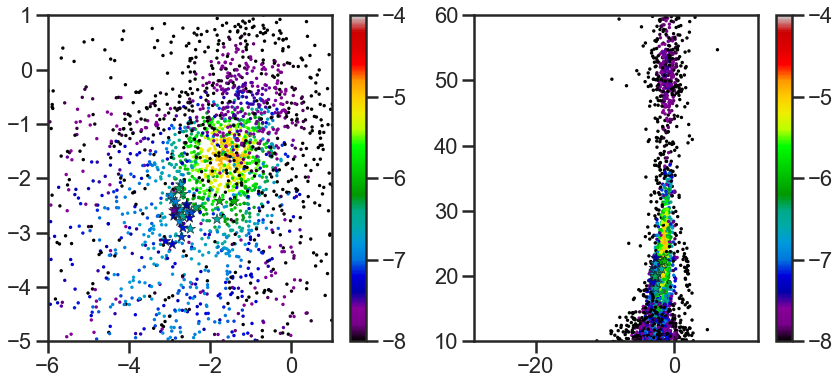

In [67]:
cm = plt.cm.nipy_spectral
vmin,vmax=-8,-4
plt.figure(1,figsize=(14,6))
plt.subplot(121)
im=plt.scatter(pmra, pmdec, c=np.log(p_bgn), s=2, cmap=cm, vmin=vmin, vmax=vmax)
plt.scatter(pmra[miembro], pmdec[miembro], c=np.log(p_bgn[miembro]), s=120, marker='*', edgecolors='k', lw=0.5, cmap=cm, vmin=vmin, vmax=vmax)
plt.colorbar(im)
plt.xlim(-6,1)
plt.ylim(-5,1)

plt.subplot(122)
im=plt.scatter(pmra, d, c=np.log(p_bgn), s=2, vmin=vmin, vmax=vmax, cmap=cm)
plt.scatter(pmra[miembro], d[miembro], c=(np.log(p_bgn)[miembro]), s=120, vmin=vmin, vmax=vmax, marker='*', edgecolors='k', lw=0.5,cmap=cm)
plt.colorbar(im)
#plt.xlim(-6,1)
plt.ylim(10,60)

(-5.0, 1.0)

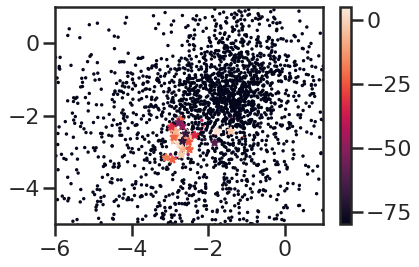

In [62]:
im=plt.scatter(pmra, pmdec, c=(logLs), s=2, vmin=-80, vmax=5)
plt.scatter(pmra[miembro], pmdec[miembro], c=(logLs[miembro]), s=50, vmin=-80, vmax=5, marker='*')
plt.colorbar(im)
plt.xlim(-6,1)
plt.ylim(-5,1)

(-5.0, 1.0)

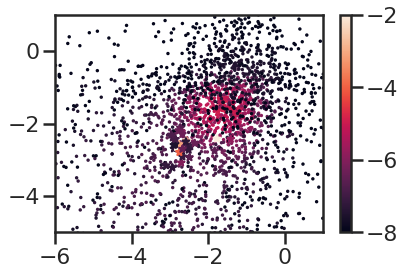

In [60]:
im=plt.scatter(pmra, pmdec, c=(logL), s=2, vmin=-8, vmax=-2)
plt.scatter(pmra[miembro], pmdec[miembro], c=(logL[miembro]), s=50, vmin=-8, vmax=-2, marker='*')
plt.colorbar(im)
plt.xlim(-6,1)
plt.ylim(-5,1)

In [17]:
#Valores limites antes de inf
print(np.exp(709.78271))
np.exp(-744.)

1.7976879334532066e+308


1e-323

In [80]:
mm = np.abs(phi1_t.value)<0.1
mu = np.array([np.mean(pmphi1_t.value[mm]), np.mean(pmphi2_t.value[mm])])
mu

array([3.78307899, 0.71613004])

In [82]:
#Defino prior
from scipy.stats import multivariate_normal
from scipy.stats import norm

mm = np.abs(phi1_t.value)<0.1
mu = np.array([np.mean(pmphi1_t.value[mm]), np.mean(pmphi2_t.value[mm])])
d_mean = 23.6
e_mu1, e_mu2, rho_mu, e_dd = 0.022, 0.025, -0.39, 0.8
cov_mu = rho_mu*e_mu1*e_mu2 #rho_xy = sigma_xy/(sigma_x*sigma_y)
sigma = np.array([[(e_mu1*10)**2, -(cov_mu*10)**2], [-(cov_mu*10)**2, (e_mu2*10)**2]])
print('VAPs: ',np.linalg.eig(sigma)[0])



def log_unif(p, lim_inf, lim_sup):
    if p>lim_inf and p<lim_sup:
        return 0.0
    return -np.inf


def log_prior(theta):
    a_mu1, a_mu2, a_d, b_mu1, b_mu2, b_d, c_mu1, c_mu2, c_d, x_mu1, x_mu2, x_d, f = theta
    mu = np.array([3.78307899, 0.71613004])
    d_mean = 23.6
    e_mu1, e_mu2, rho_mu, e_dd = 0.022, 0.025, -0.39, 0.8
    cov_mu = rho_mu*e_mu1*e_mu2 #rho_xy = sigma_xy/(sigma_x*sigma_y)
    sigma = np.array([[(e_mu1*10)**2, -(cov_mu*10)**2], [-(cov_mu*10)**2, (e_mu2*10)**2]])

    p_a12 = multivariate_normal.logpdf(np.stack((a_mu1, a_mu2), axis=-1), mean=mu, cov=sigma)
    p_ad = norm.logpdf(a_d, loc=d_mean, scale=e_dd)
    
    p_b1 = log_unif(b_mu1, -100, 100)
    p_b2 = log_unif(b_mu2, -100, 100)
    p_bd = log_unif(b_d, -100, 100)
    
    p_c1 = log_unif(c_mu1, -100, 100)
    p_c2 = log_unif(c_mu2, -100, 100)
    p_cd = log_unif(c_d, -100, 100)
    
    p_x1 = log_unif(x_mu1, -20, 15)
    p_x2 = log_unif(x_mu2, -20, 15)
    p_xd = log_unif(x_d, -20, 15)
                    
    p_f = log_unif(f, 0, 1)
                    
    return p_a12 + p_ad + p_b1 + p_b2 + p_bd + p_c1 + p_c2 + p_cd + p_x1 + p_x2 + p_xd + p_f


def prior_sample(mu, sigma, d_mean, e_dd, n):
    a_mu1, a_mu2 = np.random.multivariate_normal(mu, sigma, n).T
    a_d = np.random.normal(d_mean, e_dd, n)
    
    b_mu1 = np.random.uniform(-100, 100, n).T
    b_mu2 = np.random.uniform(-100, 100, n).T
    b_d = np.random.uniform(-100, 100, n).T
    
    c_mu1 = np.random.uniform(-100, 100, n).T
    c_mu2 = np.random.uniform(-100, 100, n).T
    c_d = np.random.uniform(-100, 100, n).T
    
    x_mu1 = np.random.uniform(-20, 15, n).T
    x_mu2 = np.random.uniform(-20, 15, n).T
    x_d = np.random.uniform(-20, 15, n).T

    f = np.random.uniform(0, 1, n).T

    return np.stack((a_mu1, a_mu2, a_d, b_mu1, b_mu2, b_d, c_mu1, c_mu2, c_d, x_mu1, x_mu2, x_d, f), axis=-1)

VAPs:  [0.0484 0.0625]


In [19]:
sample = prior_sample(mu, sigma, d_mean, e_dd, 1)
print(sample)
log_prior(sample.T)

[[ -2.60872112  -2.34066742  23.01553442 -12.07771594 -25.02220142
   -4.0419638   43.58248671 -58.85361164  12.87123675 -14.66602559
    5.90215444  -1.42826914   0.26899981]]


array([-1.00673567])

In [12]:
#Defino posterior
def log_posterior(theta, phi1, y, C, p_bgn):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, phi1, y, C, p_bgn)

In [88]:
#Valores iniciales
from scipy.optimize import curve_fit

theta_true = np.array([3.740, 0.686, 22.022, 4.102e-2, -2.826e-2, 9.460e-3, -6.423e-4, 2.832e-3, -6.327e-3, -1.072, -10.954, -16.081])

# miembro = (data['Memb']>0.7)

def model(phi1, a, b, c, x):
    return a + b*(phi1-x) + c*(phi1-x)**2

params_mu1, _ = curve_fit(model, phi1.value[miembro], pmphi1.value[miembro])
params_mu2, _ = curve_fit(model, phi1.value[miembro], pmphi2.value[miembro])
params_d, _ = curve_fit(model, phi1.value[miembro], d[miembro])

init = np.array([params_mu1[0], params_mu2[0], params_d[0], params_mu1[1], params_mu2[1], params_d[1], params_mu1[2], params_mu2[2], params_d[2], params_mu1[3], params_mu2[3], params_d[3], np.random.uniform(0, 1)])
# print(init)
# print(theta_true)

# fig=plt.figure(1,figsize=(8,6))
# fig.subplots_adjust(wspace=0.25,hspace=0.34,top=0.95,bottom=0.07,left=0.07,right=0.95)
# ax=fig.add_subplot(111)
# ax.plot(phi1.value, model(phi1.value, params_mu1[0], params_mu1[1], params_mu1[2],params_mu1[3]),'.r',ms=1)
# ax.plot(phi1.value, model(phi1.value, 3.740,4.102e-2,-6.423e-4,-1.072),'.b',ms=1)
# ax.plot(phi1.value, model(phi1.value, params_mu2[0], params_mu2[1], params_mu2[2],params_mu2[3]),'.r',ms=1)
# ax.plot(phi1.value, model(phi1.value, 0.686, -2.826e-2, 2.832e-3, -10.954),'.b',ms=1)
# ax.plot(phi1.value[miembro], pmphi2[miembro], '*k')
# ax.plot(phi1.value, model(phi1.value, params_d[0], params_d[1], params_d[2],params_d[3]),'.r',ms=1)
# ax.plot(phi1.value, model(phi1.value, 22.022, 9.460e-3, -6.327e-3, -16.081),'.b',ms=1)
# ax.plot(phi1.value[miembro], d[miembro], '*k')

In [90]:
from multiprocessing import Pool
import time
import emcee

In [86]:
#Defino vector de valores y matriz de covarianza del stream
d_in = (data['Dist']>18) & (data['Dist']<25)
inside = (data['Track']==1) 
out = (data['Track']==0)
miembro = inside & (data['Memb']>0.5)

xx = phi1[miembro]
y = np.array([pmphi1.value[miembro], pmphi2.value[miembro], d[miembro]])
C = np.array([[0.05**2, 0., 0.], [0., 0.05**2, 0.], [0., 0., 0.2**2]]) #mas/yr, mas/yr, kpc
p_bg = p_bgn[miembro]

In [70]:
#-----------SERIAL RUN-------------
nwalkers, ndim, steps = 104, 13, 2**8
# pos = prior_sample(mu, sigma, d_mean, e_dd, nwalkers) + 1e-4*np.random.randn(nwalkers, 13) #13 parametros iniciales
pos = init*np.ones((nwalkers,ndim)) + init*1e-1*np.random.randn(nwalkers, 13) #13 parametros iniciales
sampler2 = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(xx, y, C, p_bg))
start = time.time()
sampler2.run_mcmc(pos, steps, progress=True, ); 
end = time.time()
serial_time = end-start
print(serial_time)

100%|█████████████████████████████████████████| 256/256 [00:08<00:00, 29.51it/s]

8.727460384368896


In [69]:
from multiprocessing import cpu_count

ncpu = cpu_count()
print("{0} CPUs".format(ncpu))

16 CPUs


In [91]:
#--------------- NCPU RUN--------------------------
nwalkers, ndim, steps = 104, 13, 2**14
#pos = prior_sample(mu, sigma, d_mean, e_dd, nwalkers) #+ 1e-4*np.random.randn(nwalkers, 13) #13 parametros iniciales
pos = init*np.ones((nwalkers,ndim)) + init*1e-1*np.random.randn(nwalkers, 13) #13 parametros iniciales
with Pool() as pool:
    sampler2 = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(xx, y, C, p_bg), pool=pool )
    start = time.time()
    sampler2.run_mcmc(pos, steps, progress=True, ); 
    end = time.time()
    multi_time = end-start 
    # print(multi_time,serial_time/multi_time)

100%|█████████████████████████████████████| 16384/16384 [05:21<00:00, 50.99it/s]


In [ ]:
# tau = sampler.get_autocorr_time()
# print(tau)

tau2 = sampler2.get_autocorr_time()
print(tau2)

In [83]:
# mu = np.array([-2.728, -2.687])
d_mean = 23.6
e_mu1, e_mu2, rho_mu, e_dd = 0.022, 0.025, -0.39, 0.8
cov_mu = rho_mu*e_mu1*e_mu2 #rho_xy = sigma_xy/(sigma_x*sigma_y)
sigma = np.array([[(e_mu1*10)**2, -(cov_mu*10)**2], [-(cov_mu*10)**2, (e_mu2*10)**2]])

theta_true = np.array([3.740, 0.686, 22.022, 4.102e-2, -2.826e-2, 9.460e-3, -6.423e-4, 2.832e-3, -6.327e-3, -1.072, -10.954, -16.081])
f=np.sum(miembro)/phi1.size

n=2**13
samp = prior_sample(mu, sigma, d_mean, e_dd, n)



In [48]:
(t[:,2:14]).shape

(8192, 11)

In [84]:
a_mu1M, a_mu2M = np.meshgrid(np.linspace(min(samp[:,0]),max(samp[:,0]),100), np.linspace(min(samp[:,1]),max(samp[:,1]),100))
a_mu1 = a_mu1M.flatten()
a_mu2 = a_mu2M.flatten()

t = np.append(theta_true,f)*np.ones((10000,13))
t[:,0]=a_mu1
t[:,1]=a_mu2

logL1 =np.array([])
for i in range(t.shape[0]):
    aux = log_posterior(t[i], xx, y, C, p_bg)
    logL1 = np.append(logL1, aux)

In [59]:
logL1.shape



(8192,)

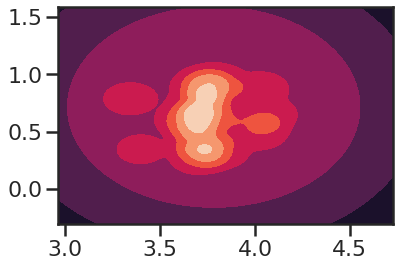

In [85]:
plt.contourf(a_mu1M,a_mu2M,logL1.reshape(a_mu1M.shape))

(15912, 13)


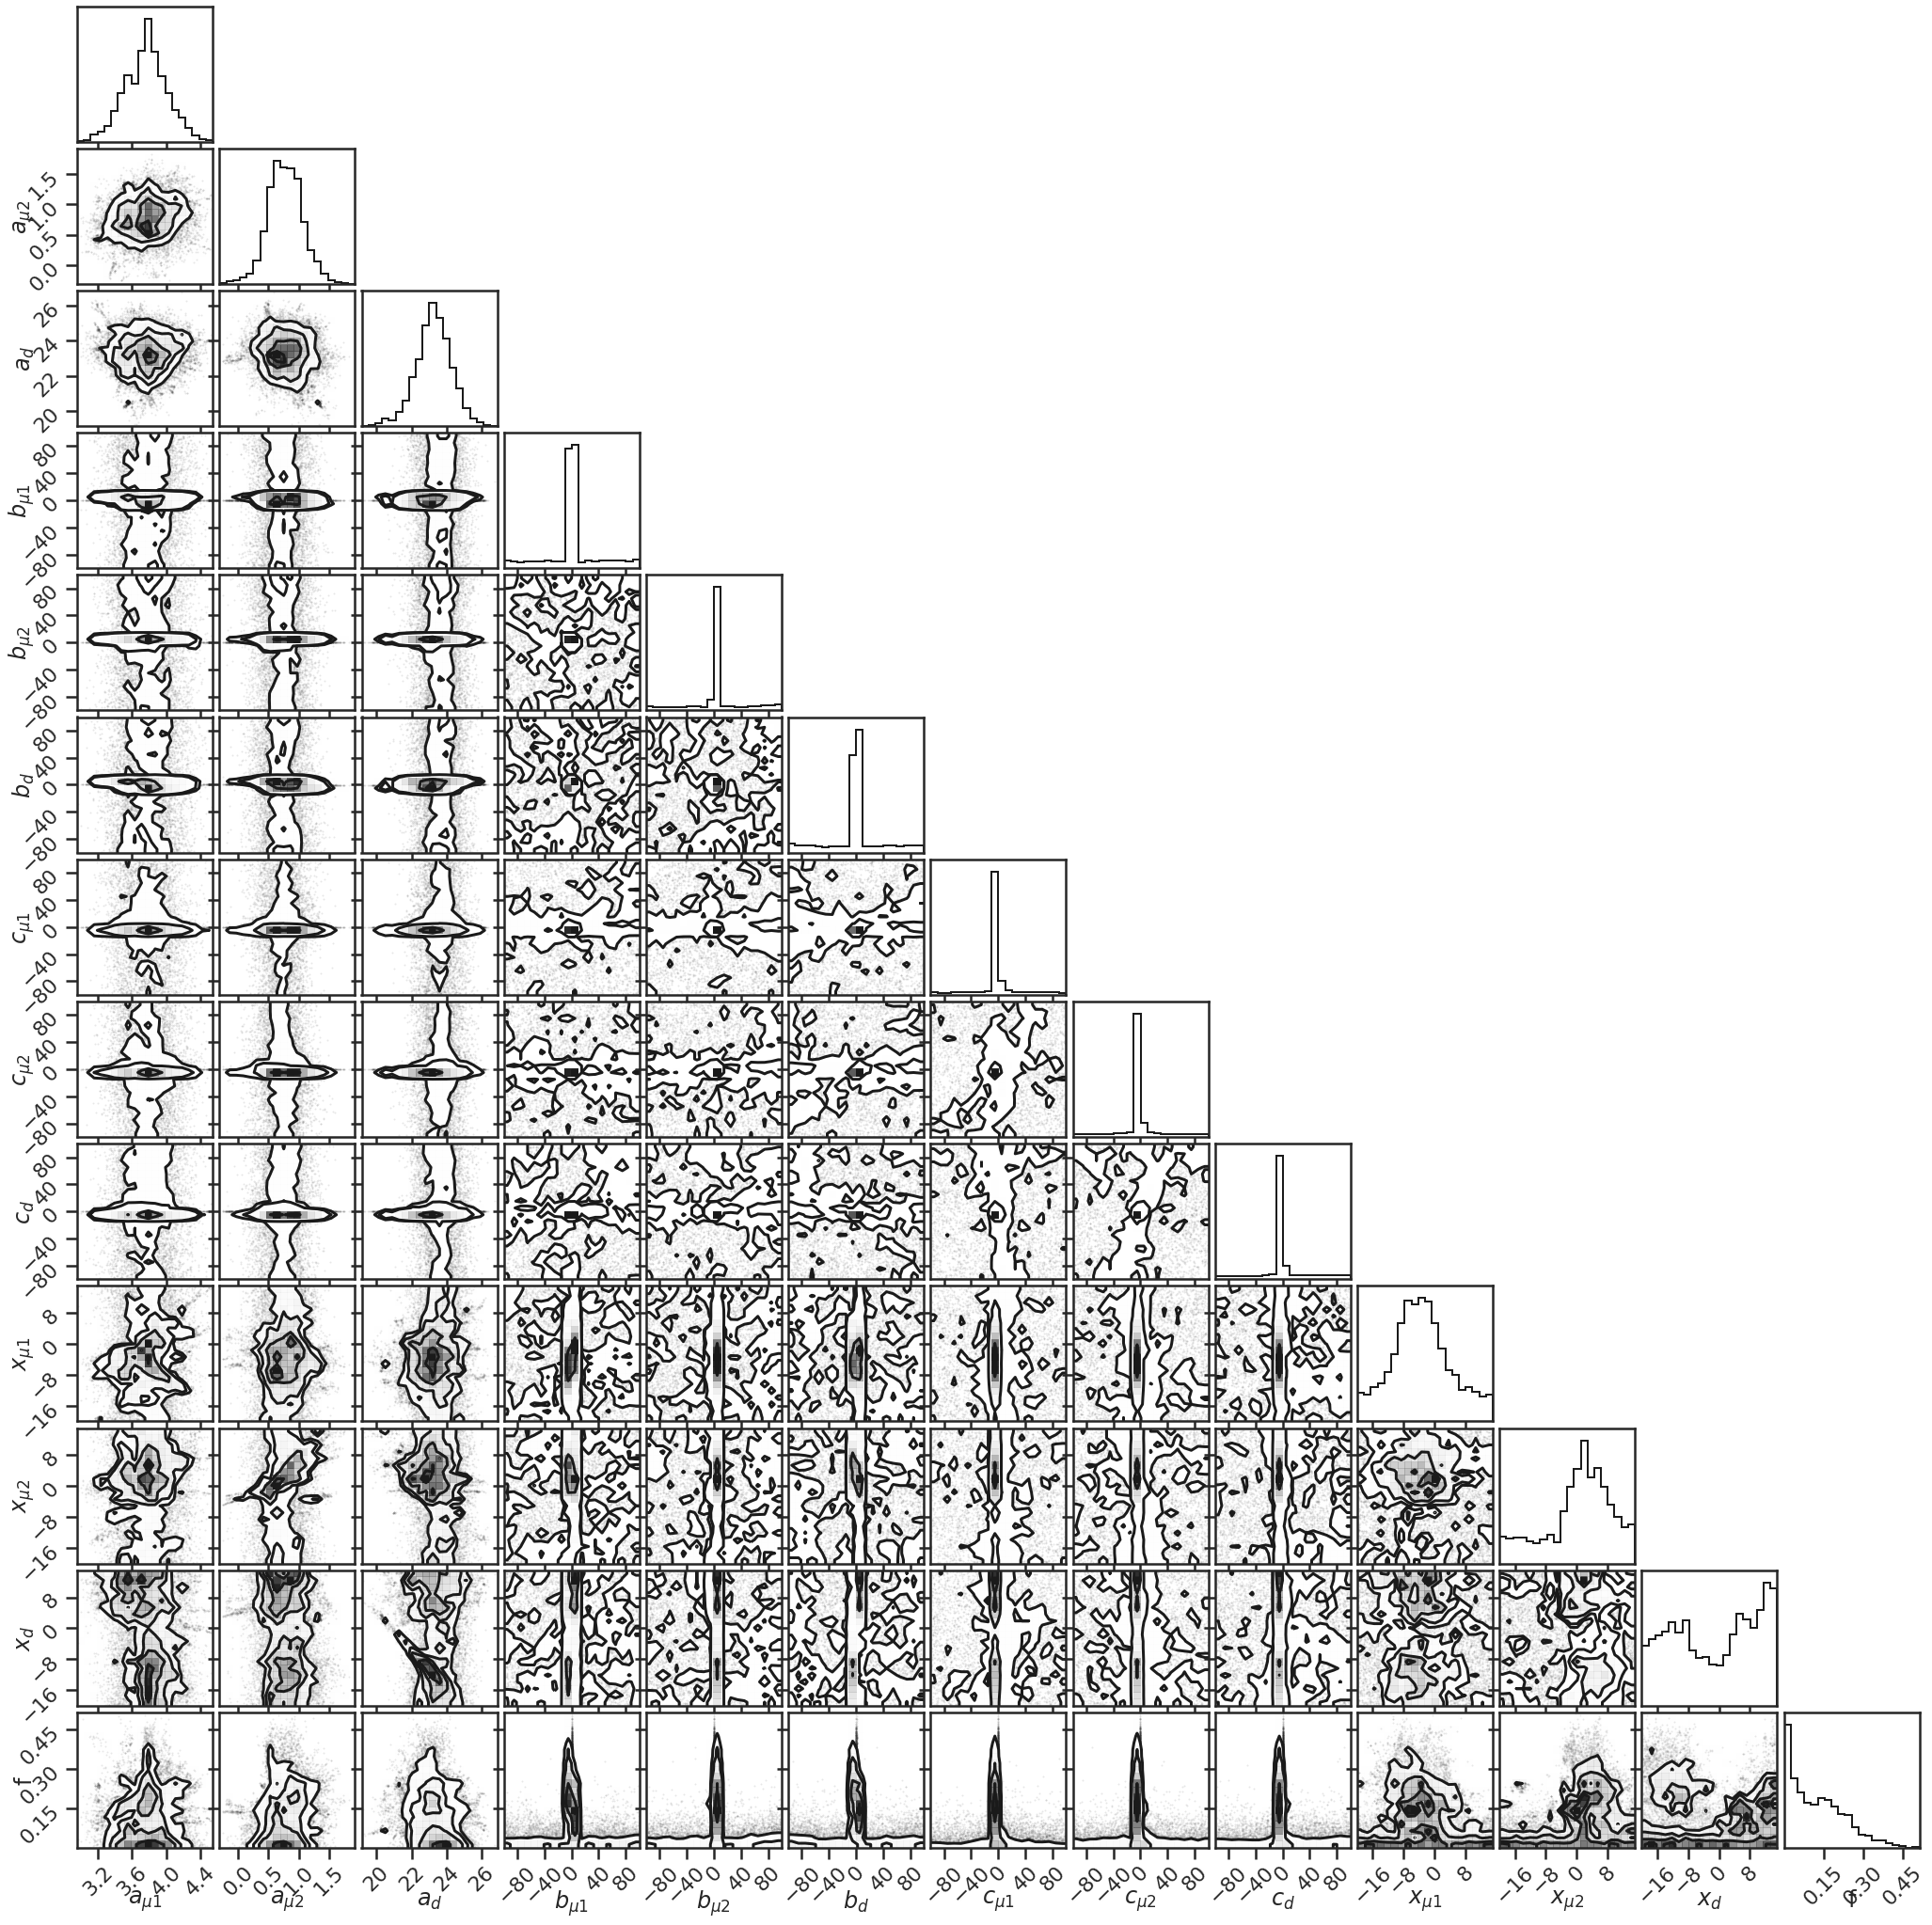

In [92]:
# import corner
# flat_samples = sampler.get_chain(discard=2**10, thin=2200, flat=True)
flat_samples2 = sampler2.get_chain(discard=1000, thin=100, flat=True)
print(flat_samples2.shape)

labels = ["$a_{\mu1}$", "$a_{\mu2}$", "$a_d$", "$b_{\mu1}$", "$b_{\mu2}$", "$b_d$", "$c_{\mu1}$", "$c_{\mu2}$", "$c_d$", "$x_{\mu1}$", "$x_{\mu2}$", "$x_d$", "f"]
fig = corner.corner(
    flat_samples2, labels=labels#, truths=[m_true, b_true, np.log(f_true)]
);

#theta_post2 = pd.DataFrame(flat_samples2, columns=labels)
#theta_post2.to_csv('theta_post2.csv', index=False)

In [18]:
#Guardo las posteriors

# post = [None for n in range(len(flat_samples2))]

# for i in range(len(flat_samples2)):
#     theta = flat_samples2[i]
#     post[i] = log_posterior(theta, phi1, y, C, p_bgn)
#     if i%1000==0:
#         print('N =',i)

# theta_post2['Posterior'] = post
# theta_post2.to_csv('theta_post2.csv', index=False)
# flat_samples2 = np.insert(flat_samples2, flat_samples2.shape[1], np.array(post), axis=1)

#Maximum a Posterior    
MAP = max(post)
theta_max = flat_samples2[np.argmax(post)]

#Median posterior
argpost = np.argsort(post)
medP = np.percentile(post,50)
i_50 = abs(post-medP).argmin()
# theta_med = flat_samples2[argpost[int(flat_samples2.shape[0]/2)]]
theta_med = flat_samples2[i_50]

#Percentiles 5 y 95
p5 = np.percentile(post,5)
p95 = np.percentile(post,95)
i_5 = abs(post-p5).argmin()
i_95 = abs(post-p5).argmin()

theta_5 = flat_samples2[i_5]
theta_95 = flat_samples2[i_95]


In [19]:
theta_resul = pd.DataFrame(columns = ["$a_{\mu1}$", "$a_{\mu2}$", "$a_d$", "$b_{\mu1}$", "$b_{\mu2}$", "$b_d$", "$c_{\mu1}$", "$c_{\mu2}$", "$c_d$", "$x_{\mu1}$", "$x_{\mu2}$", "$x_d$", "f", "Posterior"])
theta_resul.loc[0] = theta_max
theta_resul.loc[1] = theta_med
theta_resul.loc[2] = theta_5
theta_resul.loc[3] = theta_95
theta_resul.index = ['MAP','median','5th','95th']

theta_resul.to_csv('theta_resul.csv', index=False)

In [20]:
theta_resul


,$a_{\mu1}$,$a_{\mu2}$,$a_d$,$b_{\mu1}$,$b_{\mu2}$,$b_d$,$c_{\mu1}$,$c_{\mu2}$,$c_d$,$x_{\mu1}$,$x_{\mu2}$,$x_d$,f,Posterior
MAP,-2.721521,-2.642796,23.503645,3.096821,94.282661,68.990273,-90.917860,-20.847253,-86.369590,10.080613,1.391202,9.796366,5.805001e-07,-26019.802629
median,-2.838755,-2.927509,24.820836,35.470803,61.131000,-3.161212,21.143184,-72.522496,93.472303,-15.097567,0.031706,10.034642,1.303424e-04,-26021.961479
5th,-3.015692,-2.337400,22.344048,52.440097,-57.483918,17.783589,-78.733699,-31.425500,74.410143,-19.276560,-13.996569,-17.240681,7.363489e-04,-26025.273232
95th,-3.015692,-2.337400,22.344048,52.440097,-57.483918,17.783589,-78.733699,-31.425500,74.410143,-19.276560,-13.996569,-17.240681,7.363489e-04,-26025.273232
